In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
data = pd.read_csv('./data/data.csv')

In [6]:
data.set_index('key', inplace=True)

##### train test split

In [13]:
test = data[data.transaction_real_price == 0]
train = data[data.transaction_real_price != 0]

##### train cv split

In [35]:
cv_idx = []

for v in list(train.groupby('apartment_id')):
    cv_idx.append(v[1].index[-1])

cv = train.loc[cv_idx].copy()
train.drop(cv_idx, inplace=True)

#### 레이블 확률분포

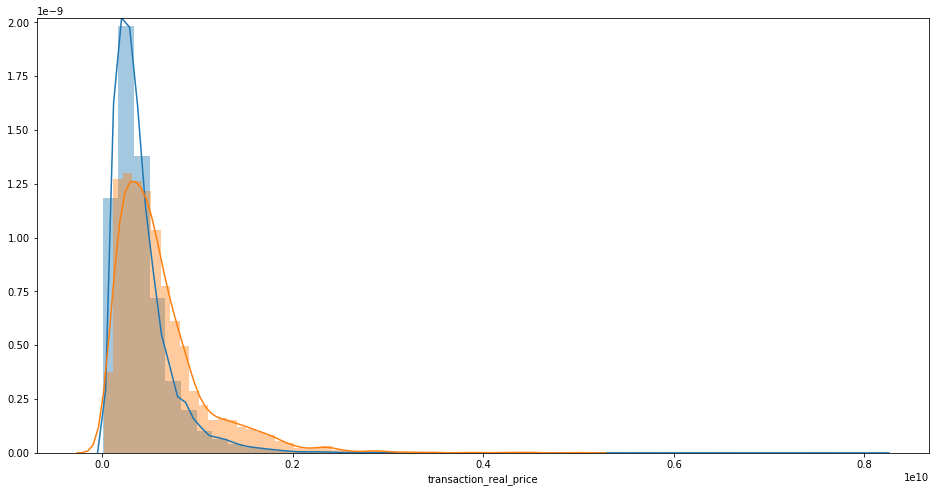

In [37]:
f, ax = plt.subplots(figsize = (16,8))
sns.distplot(train.transaction_real_price)
sns.distplot(cv.transaction_real_price)

#### 컬럼, 레이블 스캐터 플롯

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1605376 entries, 0 to 1605375
Data columns (total 39 columns):
apartment_id                          1605376 non-null int64
city                                  1605376 non-null int64
transaction_date                      1605376 non-null int64
year_of_completion                    1605376 non-null int64
exclusive_use_area                    1605376 non-null float64
floor                                 1605376 non-null int64
latitude                              1605376 non-null float64
longitude                             1605376 non-null float64
address_by_law                        1605376 non-null int64
total_parking_capacity_in_site        1605376 non-null float64
total_household_count_in_sites        1605376 non-null int64
apartment_building_count_in_sites     1605376 non-null int64
tallest_building_in_sites             1605376 non-null float64
lowest_building_in_sites              1605376 non-null float64
heat_type            

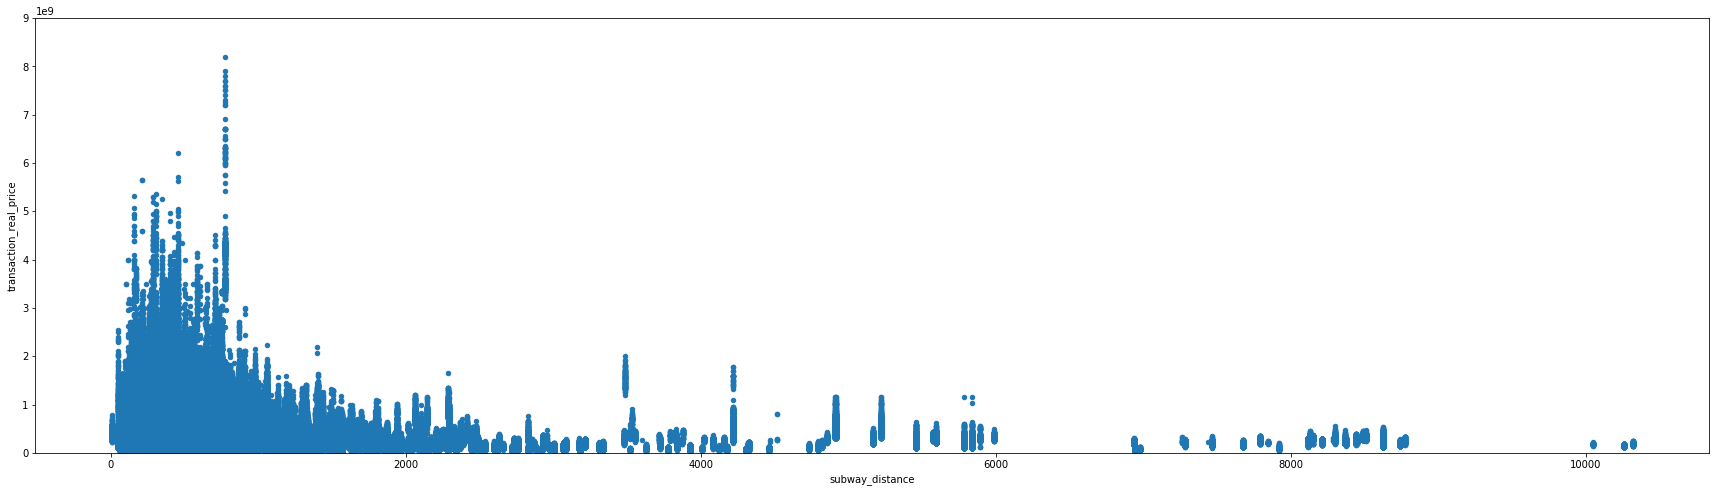

In [15]:
# 지하철과의 거리
var = 'subway_distance'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

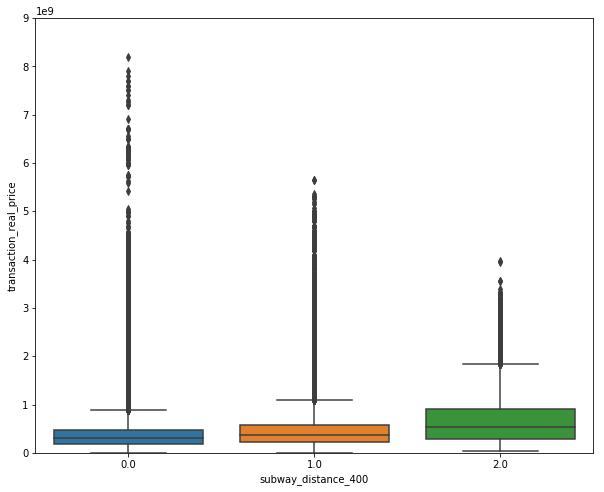

In [18]:
var = 'subway_distance_400'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

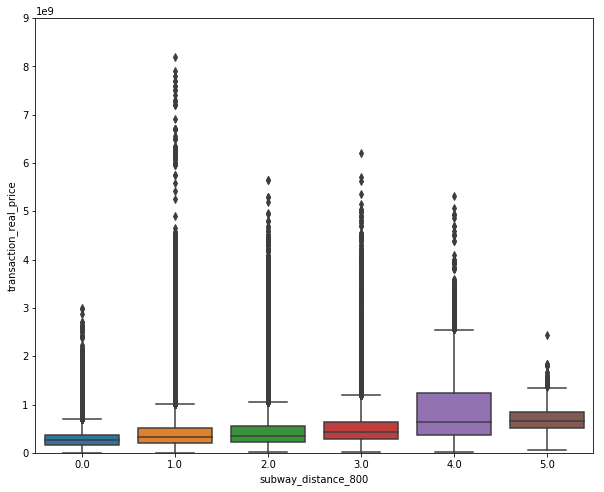

In [19]:
var = 'subway_distance_800'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

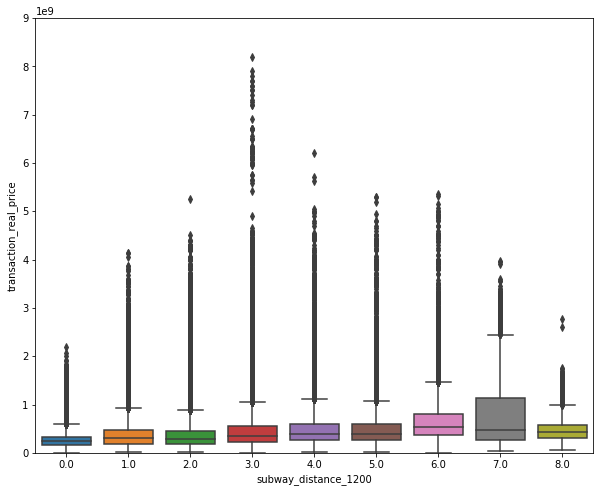

In [20]:
var = 'subway_distance_1200'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

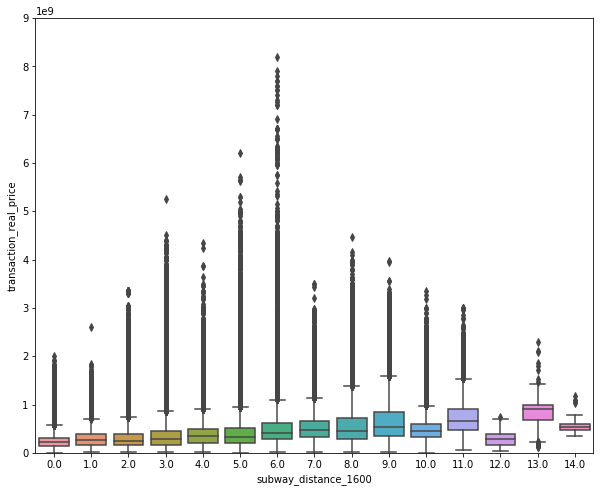

In [21]:
var = 'subway_distance_1600'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

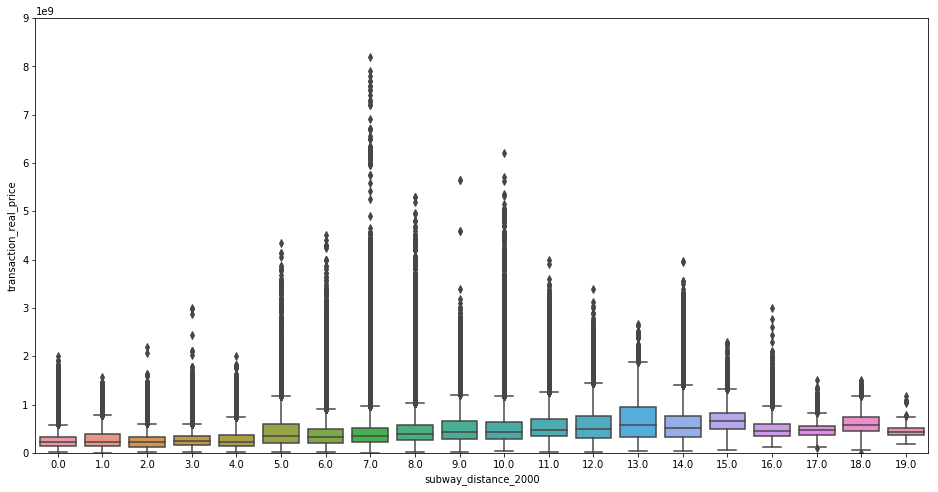

In [24]:
var = 'subway_distance_2000'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

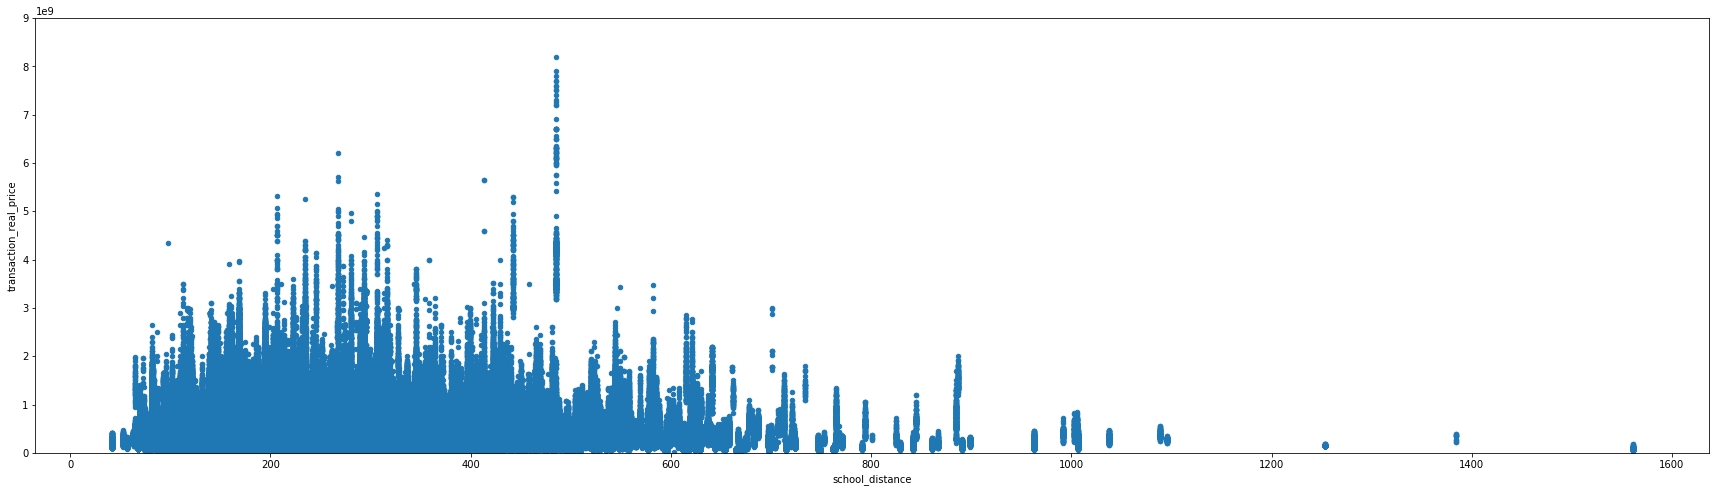

In [38]:
# 학교와의 거리
var = 'school_distance'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
data.plot.scatter(x=var, y='transaction_real_price', ylim=(0,9000000000), figsize=(30, 8));

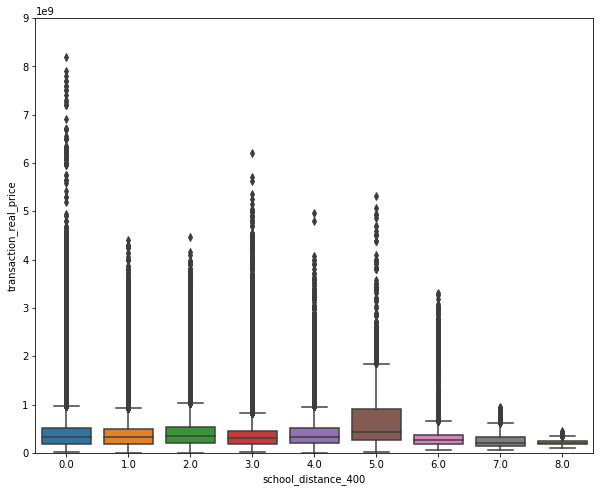

In [39]:
var = 'school_distance_400'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

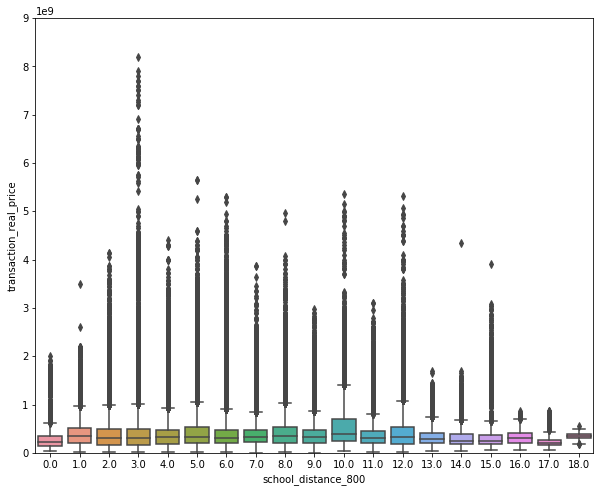

In [40]:
var = 'school_distance_800'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

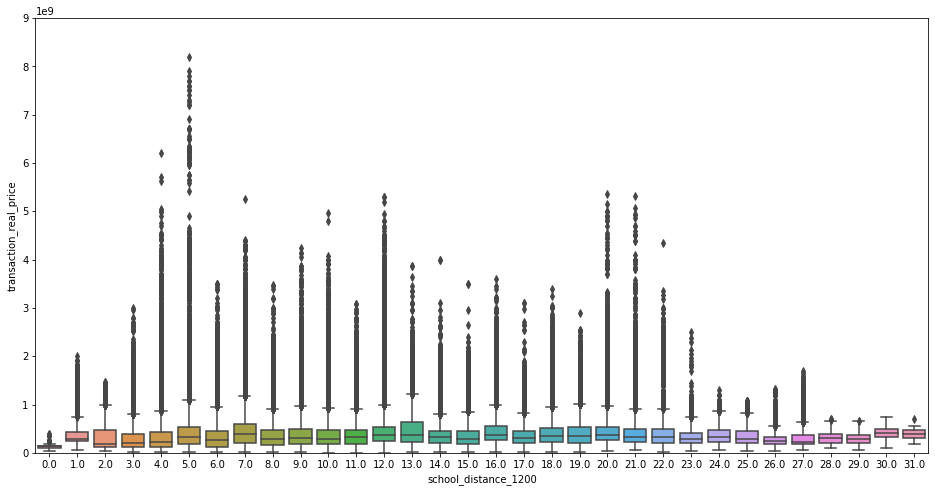

In [42]:
var = 'school_distance_1200'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

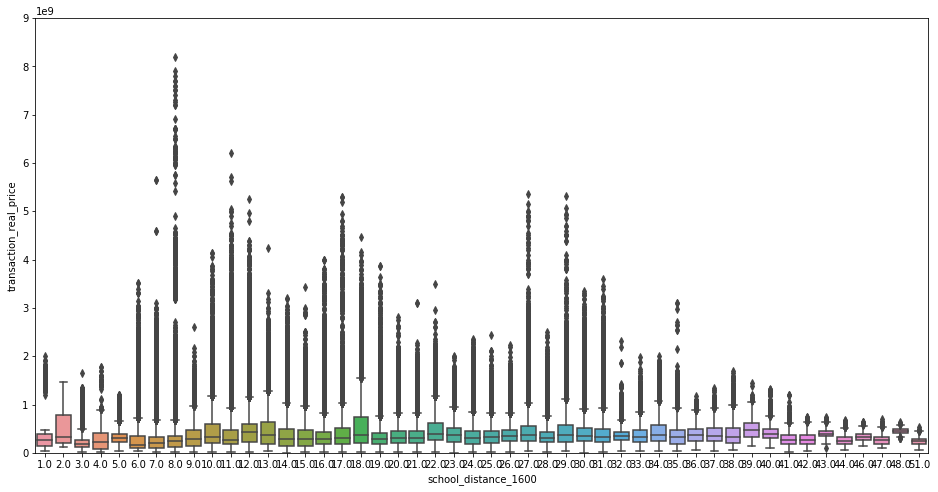

In [43]:
var = 'school_distance_1600'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

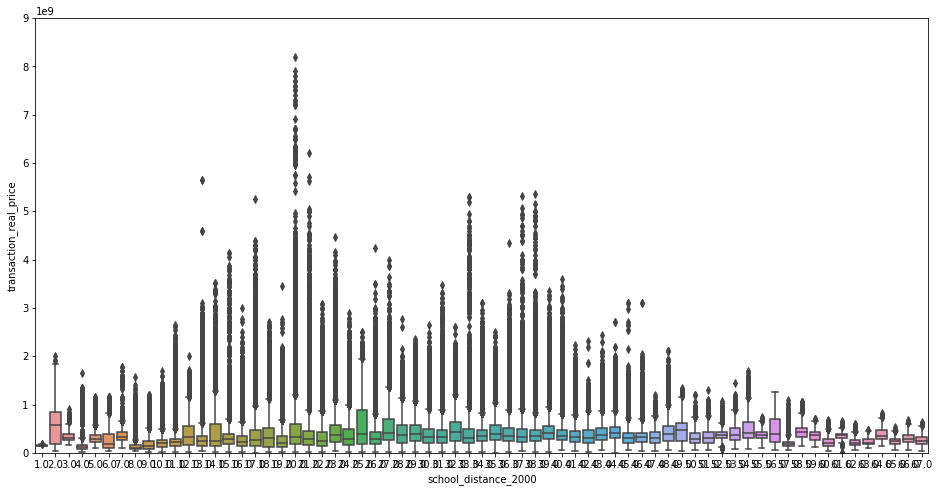

In [44]:
var = 'school_distance_2000'
data = pd.concat([train['transaction_real_price'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="transaction_real_price", data=data)
fig.axis(ymin=0, ymax=9000000000);

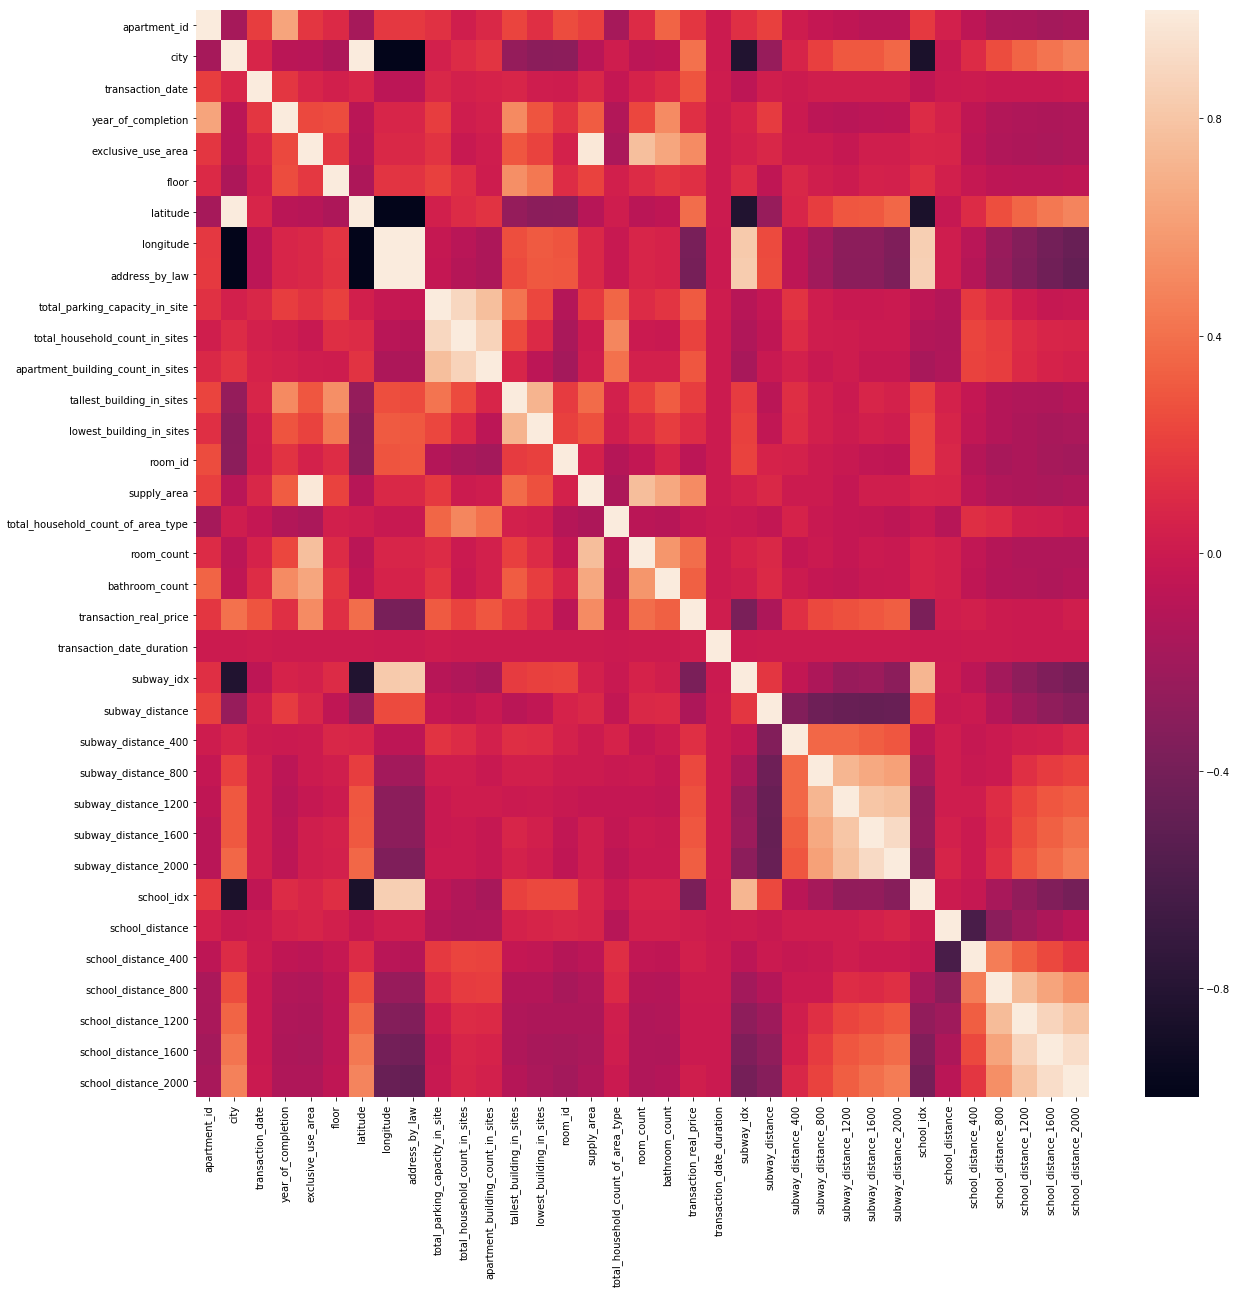

In [45]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax = 1)

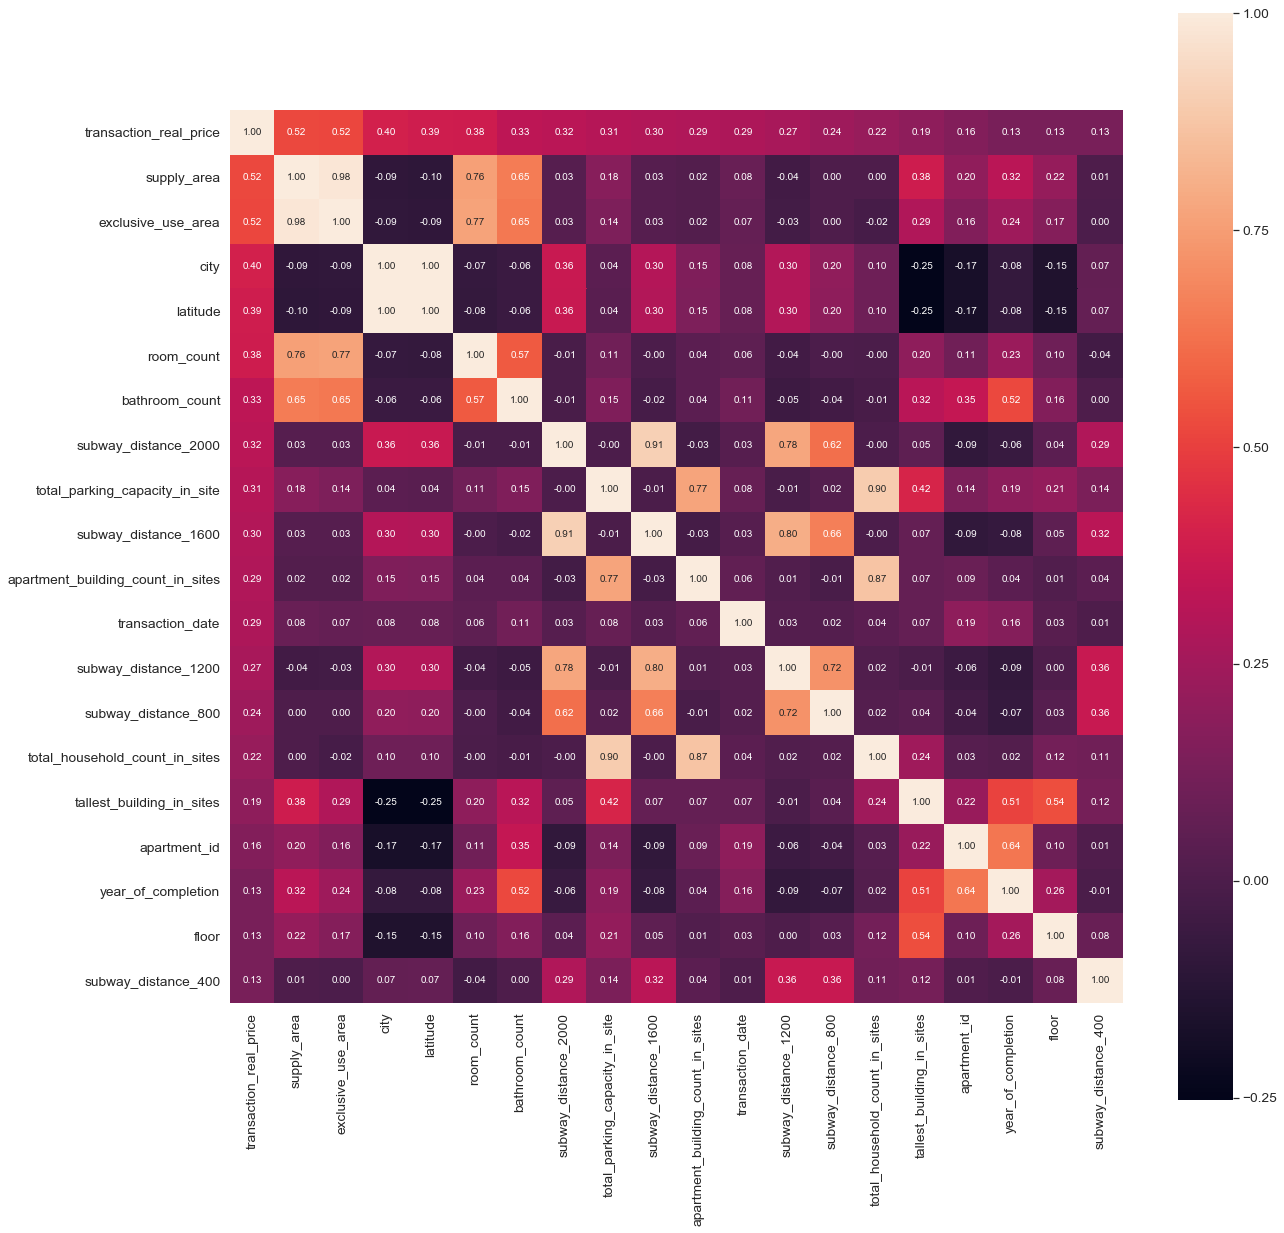

In [47]:
#saleprice correlation matrix
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(20, 20))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [61]:
train.drop(['transaction_real_price'], axis = 1).drop_duplicates()

,apartment_id,city,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,address_by_law,total_parking_capacity_in_site,...,subway_distance_1200,subway_distance_1600,subway_distance_2000,school_idx,school_distance,school_distance_400,school_distance_800,school_distance_1200,school_distance_1600,school_distance_2000
key,,,,,,,,,,,,,,,,,,,,,
0,5584,1,20060120,1999,47.4300,6,37.585965,127.000231,1111017100,163.0,...,2.0,3.0,9.0,1140.0,208.389128,3.0,7.0,19.0,30.0,36.0
1,5584,1,20060120,1999,44.3700,8,37.585965,127.000231,1111017100,163.0,...,2.0,3.0,9.0,1140.0,208.389128,3.0,7.0,19.0,30.0,36.0
2,5059,1,20060120,1992,54.7000,8,37.580511,127.014016,1111017400,902.0,...,7.0,10.0,13.0,530.0,106.530977,5.0,8.0,16.0,27.0,50.0
3,2816,1,20060120,1993,64.6600,11,37.580324,127.011788,1111017400,902.0,...,6.0,9.0,13.0,1259.0,124.064477,4.0,9.0,16.0,27.0,46.0
4,2816,1,20060120,1993,106.6200,7,37.580324,127.011788,1111017400,902.0,...,6.0,9.0,13.0,1259.0,124.064477,4.0,9.0,16.0,27.0,46.0
5,2815,1,20060120,2000,84.9200,9,37.575381,126.960804,1111018700,1365.0,...,4.0,5.0,7.0,528.0,146.827769,3.0,8.0,13.0,23.0,32.0
6,2815,1,20060120,2000,60.0000,13,37.575381,126.960804,1111018700,1365.0,...,4.0,5.0,7.0,528.0,146.827769,3.0,8.0,13.0,23.0,32.0
7,9867,1,20060120,2005,84.7600,10,37.559200,127.019503,1114016200,652.0,...,6.0,11.0,15.0,1135.0,119.228727,3.0,12.0,22.0,32.0,38.0
8,2818,1,20060120,1999,84.8800,18,37.555060,127.014495,1114016200,2091.0,...,7.0,9.0,16.0,512.0,247.888405,4.0,10.0,20.0,30.0,38.0
